In [1]:
%pylab inline
import scipy.io
from sklearn import svm
from sklearn import metrics
DEBUG=False
digit_data_test = scipy.io.loadmat("data/digit-dataset/test.mat")
digit_data_train = scipy.io.loadmat("data/digit-dataset/train.mat")

test_img= digit_data_test['test_images']
train_img= digit_data_train['train_images']
train_label= digit_data_train['train_labels']
# Code written by Kunal Marwaha on Piazza
import math
#benchmark.m, converted
def benchmark(pred_labels, true_labels):
    errors = pred_labels != true_labels
    err_rate = sum(errors) / float(len(true_labels))
    indices = errors.nonzero()
    return err_rate, indices
#montage_images.m, converted
def montage_images(images):
    num_images=min(1000,np.size(images,2))
    numrows=math.floor(math.sqrt(num_images))
    numcols=math.ceil(num_images/numrows)
    img=np.zeros((numrows*28,numcols*28));
    for k in range(num_images):
        r = k % numrows
        c = k // numrows
        img[r*28:(r+1)*28,c*28:(c+1)*28]=images[:,:,k];
    return img

Populating the interactive namespace from numpy and matplotlib


# __Problem 1.__

##### Train a linear SVM using raw pixels as features. Plot the error rate on a validation set versus the number of training ex- amples that you used to train your classifier. Make sure you set aside 10,000 training images as a validation set. The number of training ex- amples in your experiment should be 100, 200, 500, 1,000, 2,000, 5,000, and 10,000. At this stage, you should expect accuracies between 70% and 90%.


In [2]:
#Flatten the 28x28 images into 784 pixel long vectors 
train_img_flat=[]
for i in np.arange(shape(train_img)[2]):
    train_img_flat.append(train_img[:,:,i].flatten())
train_img_flat1= np.array(train_img_flat)

To debug and verify that the data partitioning is preserves a fairly uniform number of sample for each digit, I plot the histogram of the labels to visually verify that the histogram is approximately flat (i.e. uniform).

Setting aside 10,000 images for validation 

Since this data is sorted , we need to pick randomly from the sample 

In [3]:
#get a list of 10100 unique random numbers for indexing 
N=1000
num_verification = 10000
s = set()
while len(s) < N+num_verification:
    s.add(random.randint(60000))
rand_idx=np.array(list(s))
np.random.shuffle(rand_idx)

In [4]:
train_subset = []
labels_subset = []
for i in rand_idx[:N]:
    train_subset.append(train_img_flat[i])
    labels_subset.append(train_label[:,0][i])
train_subset = np.array(train_subset)
labels_subset = np.array(labels_subset)
if (DEBUG) : print shape(train_subset)
if (DEBUG) :print shape(labels_subset)

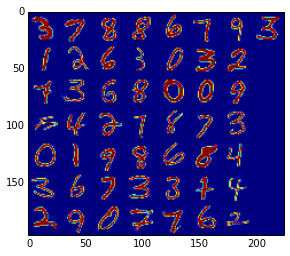

In [5]:
plt.imshow(montage_images(train_subset.T.reshape((28,28,1000))[:,:,:50]))

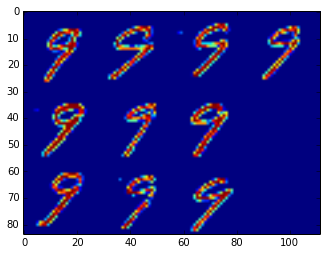

In [6]:
plt.imshow(montage_images(train_img[:,:,-10:]))

In [7]:
#Creating 10000 verification subset 
verify_train_subset = []
verify_labels_subset = []
for i in rand_idx[N:num_verification+N]:
    verify_train_subset.append(train_img_flat[i])
    verify_labels_subset.append(train_label[:,0][i])
verify_train_subset = np.array(verify_train_subset)
verify_labels_subset = np.array(verify_labels_subset)
if (DEBUG) : print shape(verify_train_subset)
if (DEBUG) :print shape(verify_labels_subset)

In [8]:
clf = svm.LinearSVC()
clf.fit(train_subset,labels_subset)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=None, tol=0.0001, verbose=0)

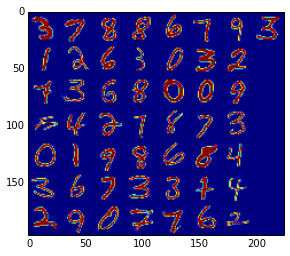

In [9]:
plt.imshow(montage_images(train_subset.T.reshape((28,28,1000))[:,:,:50]))

In [10]:
def check_classifier(i):
    fig, ax = subplots(figsize=(2,2))
    ax.imshow(verify_train_subset[i].reshape((28,28)))
    print clf.predict(verify_train_subset[i])

In [11]:
def check_classifier(i):
    fig, ax = subplots(figsize=(2,2))
    ax.imshow(train_img[:,:,i])
    print clf.predict(train_img[:,:,i].reshape(784,))

[0]
[4]
[8]
[8]
[6]
[5]


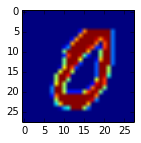

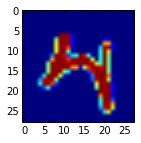

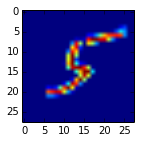

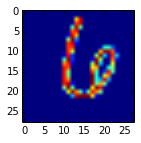

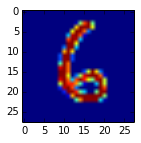

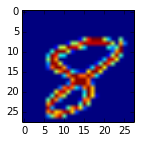

In [12]:
check_classifier(10)
check_classifier(30000)
check_classifier(35000)
check_classifier(38720)
check_classifier(41000)
check_classifier(51000)

In [13]:
result = clf.predict(verify_train_subset)
print shape(verify_labels_subset)
print shape(result)

(10000,)
(10000,)


(0, 100)

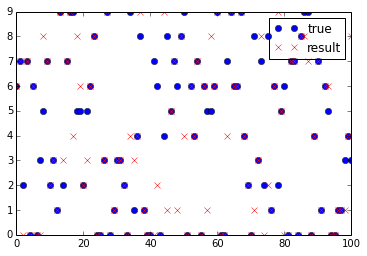

In [14]:
plt.plot(verify_labels_subset,'o',label="true")
plt.plot(result,'x',color="red",label="result")
plt.legend()
plt.xlim(0,100)

In [15]:
def plot_confusion_matrix(conf_mat, title='Confusion matrix'):
    plt.figure()
    plt.imshow(conf_mat, interpolation='nearest', cmap= plt.cm.YlOrRd)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks, rotation=45)
    plt.yticks(tick_marks, tick_marks)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [16]:
def q1(N,DEBUG=False):
    #Flatten the 28x28 images into 784 pixel long vectors 
    train_img_flat=[]
    for i in np.arange(shape(train_img)[2]):
        train_img_flat.append(train_img[:,:,i].flatten())
    train_img_flat= np.array(train_img_flat)
    #get a list of 10100 unique random numbers for indexing 
#     N=1000
    num_verification = 10000
    s = set()
    while len(s) < N+num_verification:
        s.add(random.randint(60000))
    rand_idx=np.array(list(s))
    np.random.shuffle(rand_idx)
    if (DEBUG):print len(rand_idx) 
    #Creating N number of Training set/Labels 
    train_subset = []
    labels_subset = []
    for i in rand_idx[:N]:
        train_subset.append(train_img_flat[i])
        labels_subset.append(train_label[:,0][i])
    train_subset = np.array(train_subset)
    labels_subset = np.array(labels_subset)
    if (DEBUG) : print shape(train_subset)
    if (DEBUG) :print shape(labels_subset)
    #Creating 10000 verification subset 
    verify_train_subset = []
    verify_labels_subset = []
    for i in rand_idx[N:num_verification+N]:
        verify_train_subset.append(train_img_flat[i])
        verify_labels_subset.append(train_label[:,0][i])
    verify_train_subset = np.array(verify_train_subset)
    verify_labels_subset = np.array(verify_labels_subset)
    if (DEBUG) : print shape(verify_train_subset)
    if (DEBUG) :print shape(verify_labels_subset)
    #Training SVM classifier
    clf = svm.SVC(kernel='linear')
    clf.fit(train_subset,labels_subset)
    result = clf.predict(verify_train_subset)
    if (DEBUG):
        plt.plot(verify_labels_subset,'o',label="true")
        plt.plot(result,'x',color="red",label="result")
        plt.legend()
        plt.xlim(0,100)
    error_rate = benchmark(result,verify_labels_subset)[0]
    wrong_labels = benchmark(result,verify_labels_subset)[1][0]
    print ("N={}".format(N))
    conf_mat = metrics.confusion_matrix(verify_labels_subset,result)
    print("Confusion matrix:\n%s" % conf_mat)
    plot_confusion_matrix(conf_mat, title="Confusion Matrix N={}".format(N))
    return error_rate

N=100
Confusion matrix:
[[ 762    1    9   38    7   97   34   25   18    9]
 [   0 1023    5    8    1    6    1    0   54   19]
 [  24   43  636   53   15    3   75   11   61   38]
 [   5   20   26  645    0   79    5   18  159   73]
 [   1   25    2    2  466    1   55   25   18  377]
 [  17   67   21  106   13  437   74   12  108   72]
 [  17   39   63    2   29   52  734    0   12    8]
 [  10   87    3   13   18    6    0  720   45  141]
 [   9   74   37  116    2   49   24    3  582   99]
 [  12   19    5   13   40    4    1   50   63  794]]
N=200
Confusion matrix:
[[ 728    1   27   70    5   86   82   19   12    2]
 [   0 1062   23    4    1    4    2    0   16    0]
 [  33   64  714   28   19    2   73   33   27    8]
 [  23   48   20  773    0   43    9   18   43   13]
 [   2   32    8    3  767    2   29    6    8   97]
 [  26   74    6  130   21  512   32   36   35    3]
 [  17   33   11    4   13   16  913    0    5    1]
 [  12   50   15   45   31    1    2  856    7   3

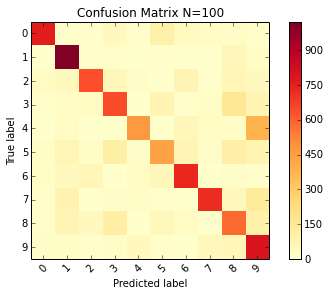

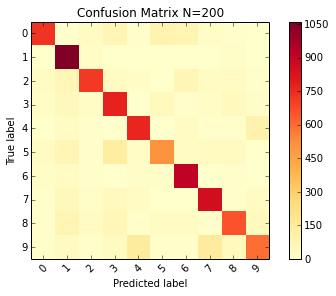

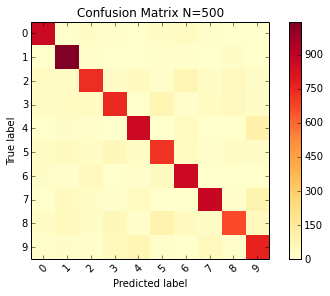

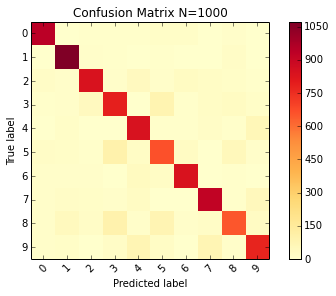

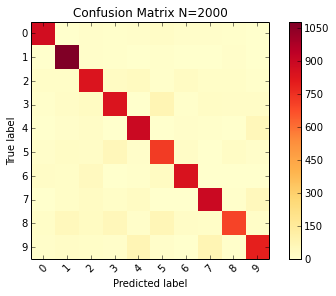

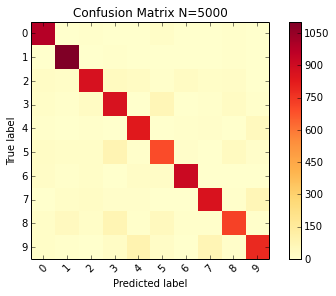

In [17]:
err_lst = []
trainset_size = [100, 200, 500, 1000, 2000, 5000]
for i in trainset_size:
    err_lst.append(q1(i))

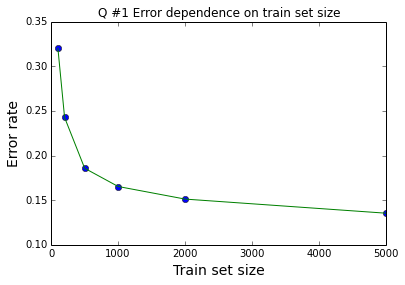

In [18]:
plt.plot(trainset_size,np.array(err_lst),'o')
plt.plot(trainset_size,np.array(err_lst),'-')
plt.xlabel("Train set size",fontsize=14)
plt.ylabel("Error rate",fontsize=14)
plt.title("Q #1 Error dependence on train set size")

# __Problem 2.__

##### Create confusion matrices2 for each experiment in Problem 1. Color code and report your results. You may use built-in implementations to generate confusion matrices. What insights can you get about the performance of your algorithm from looking at the confusion matrix?

The confusion matrix is a 10x10 matrix since we have 10 features (numbers 0~9). We see very strong central diagonals because those indicate the number of datapoints that have their predicted classiciation the same as the same as the actual label from the verification dataset, this indicates that are classifier is doing a good job. As the sample size increases, we see that the non-diagonal elements have a lower and lower value (more yellower in my colormap), this is because the non-diagonal elements indicate that the labels and predicted labels don't correspond. We find that there are less misclassifications as the training set increases. Confusion Matrix for each training test size is plotted above and defined in the function ``plot_confusion_matrix". 

#__Problem 3.__

###### Explain why cross-validation helps. Implement cross- validation5 and find the optimal value of the parameter C using 10- fold cross-validation on the training set with 10,000 examples. Train a linear SVM with this value of C. Please report your C value, the validation error rate, and your Kaggle score. If you used additional features, please (briefly) describe what features you added, removed, or modified.



Cross validation is important because often we have a machine learning model that depends on some parameter that we want to tune to optimize (speed, accuracy ..etc) . So cross validation splits up our sample so that we can conduct these experiments with different values of the model parameter and then it returns a score computed from the  mean squared error that enable us to evaluate whether that is a good value to use for the model or find the best parameter that gives the most accurate result.

In [19]:
#Setting up the problem k=10-fold cross validation
N_total = 10000
data = train_img_flat[:N_total]
k=10
batch_size =shape(data)[0]/k
if (DEBUG): print batch_size
#Creating a list of 10000 random numbers
s = set()
while len(s) < N_total:
    s.add(random.randint(60000))
rand_idx=np.array(list(s))
np.random.shuffle(rand_idx)

In [20]:
DEBUG = True
#Creating a gigantic array of all the training sets, grouped by each batch (fold)
mega_train_subset=[]
mega_labels_subset=[]
#Looping through each fold
for i in np.arange(k)+1:
#     print "Batch {}".format(i)
    train_subset = []
    labels_subset = []
#     print (i-1)*batch_size
#     print i*batch_size
#     print shape(rand_idx[(i-1)*batch_size:i*batch_size])
    #Merge data for each batch into one
    for idx in rand_idx[(i-1)*batch_size:i*batch_size]:
        train_subset.append(train_img_flat[idx])
        labels_subset.append(train_label[:,0][idx])
    train_subset = np.array(train_subset)
    labels_subset = np.array(labels_subset)
    mega_train_subset.append(train_subset)
    mega_labels_subset.append(labels_subset)
mega_train_subset = np.array(mega_train_subset)
mega_labels_subset = np.array(mega_labels_subset)
if (DEBUG): print shape(mega_train_subset)
if (DEBUG): print shape(mega_labels_subset)

(10, 1000, 784)
(10, 1000)


In [21]:
mse_lst_for_diff_C = []
# C_list = [1e-5,1e-2,1,10,100,1000,1e5,1e8,1e10,1e20] 
C_list = [1e-10,1e-8,1e-7,1e-5, 1e-3,1e-2]#,1000,1e5,1e8,1e10] 
for c in C_list:
    if (DEBUG): print "Testing C={}".format(c)
    mse_err_lst=[]
    for k_th_set in np.arange(k):
        #selecting the kth element for verification set
        verify_data = mega_train_subset[k_th_set]
        verify_labels = mega_labels_subset[k_th_set]
        #select only the ones EXCLUDING the kth element for training
        train_data = np.concatenate((mega_train_subset[:k_th_set-1,:,:],mega_train_subset[k_th_set:,:,:]))
        #Merging all the kth batches into one large datafile 
        train_data =  train_data.reshape((shape( train_data)[0]*batch_size,shape(train_data)[2]))
        train_labels = np.concatenate((mega_labels_subset[:k_th_set-1],mega_labels_subset[k_th_set:]))
        train_labels = train_labels.reshape((shape(train_labels)[0]*batch_size,))
#         print shape(train_labels)[0]*batch_size
#         print shape(train_data)
#         print shape(train_labels)
#         clf = svm.SVC(kernel="linear", C=c)
        clf = svm.LinearSVC(C=c)
        clf.fit(train_data,train_labels)
        result = clf.predict(verify_data)
        mse = benchmark(verify_labels, result)[0]
#         print mse
        mse_err_lst.append(mse)
#     print "average mse: ", mean(mse_err_lst)
    mse_lst_for_diff_C.append(mean(mse_err_lst))

Testing C=1e-10
Testing C=1e-08
Testing C=1e-07
Testing C=1e-05
Testing C=0.001
Testing C=0.01


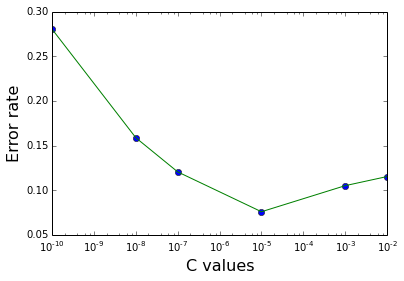

In [22]:
plt.xlabel("C values",fontsize=16)
plt.ylabel("Error rate",fontsize=16)
plt.semilogx(C_list,mse_lst_for_diff_C,'o')
plt.semilogx(C_list,mse_lst_for_diff_C,'-')

I kept trying smaller and smaller ranges around 1e-6 and 1e-4 and found the best C value. 

#### Best C values is __5e-5__ for N=10000 dataset 

In [23]:
digit_data_test = scipy.io.loadmat("data/digit-dataset/test.mat")
digit_data_train = scipy.io.loadmat("data/digit-dataset/train.mat")

test_img= digit_data_test['test_images'].T
train_img= digit_data_train['train_images']
train_label= digit_data_train['train_labels']
test_img_flat=[]
for i in np.arange(shape(test_img)[2]):
    test_img_flat.append(test_img[:,:,i].flatten())
test_img_flat= np.array(test_img_flat)
clf = svm.LinearSVC(C=5e-5)
clf.fit(train_data,train_labels)
result = clf.predict(test_img_flat)
a = numpy.array([np.arange(1,10001),result],dtype=np.int64).T
print shape(a)
numpy.savetxt("Submission.csv", a, delimiter=",",fmt='%i')

(10000, 2)


#### Training with 60000 images to increase Kaggle score. 

In [24]:
clf = svm.LinearSVC(C=5e-5)
clf.fit(train_img_flat,train_label[:,0])
result =  clf.predict(test_img_flat)
a = numpy.array([np.arange(1,10001),result],dtype=np.int64).T
print shape(a)
numpy.savetxt("Submission_Digits.csv", a, delimiter=",",fmt='%i')

(10000, 2)


Now the Kaggle score went up from 0.83280 to  0.88520 ! 

No additional feature was added or removed for my classifier.

# __Problem 4.__

##### Use your cross-validation implementation from above to train a linear SVM for your spam dataset. Please report your C value, the validation error rate, and your Kaggle score. If you mod- ified the spam features, please (briefly) describe what features you added, removed, or modified.

Here the features are words, there are 32 words inside featurize.py

In [25]:
spam_data_test = scipy.io.loadmat("data/spam-dataset/spam_data.mat")
test_data = spam_data_test['test_data']
train_data = spam_data_test['training_data']
train_label = spam_data_test['training_labels']

In [26]:
#Setting up the problem k=10-fold cross validation
N_total = 5170
k=10
train_data=train_data[:N_total]
batch_size = int(np.ceil(shape(train_data)[0]/float(k)))
if (DEBUG): print batch_size
#Creating a list of 10000 random numbers
s = set()
while len(s) < N_total:
    s.add(random.randint(N_total))
rand_idx=np.array(list(s))
np.random.shuffle(rand_idx)

#Creating a gigantic array of all the training sets, grouped by each batch (fold)
mega_train_subset=[]
mega_labels_subset=[]
#Looping through each fold
for i in np.arange(k)+1:
#     print "Batch {}".format(i)
    train_subset = []
    labels_subset = []
    #Merge data for each batch into one
    for idx in rand_idx[(i-1)*batch_size:i*batch_size]:
        train_subset.append(list(train_data)[idx].tolist())
        labels_subset.append(list(train_label)[0][idx].tolist())
    train_subset = np.array(train_subset, dtype=uint8)
    labels_subset = np.array(labels_subset, dtype=uint8)
#     print shape(train_subset)
#     print shape(labels_subset)
    mega_train_subset.append(train_subset)
    mega_labels_subset.append(labels_subset)
mega_train_subset = np.array(mega_train_subset)
mega_labels_subset = np.array(mega_labels_subset)
if (DEBUG): print shape(mega_train_subset)
if (DEBUG): print shape(mega_labels_subset)

517
(10, 517, 34)
(10, 517)


In [29]:
mse_lst_for_diff_C = []
# C_list = [1e-5,1e-2,1,10,100,1000,1e5,1e8,1e10,1e20] 
# C_list = [1e-6,1e-5, 1e-4,5e-4,1e-3,5e-3, 1e-2]
# C_list = [5e-3, 1e-2,1e-1,1,10]
# C_list = [1,10,100,100]
# C_list = [2,5,8,10,15,20,40,60,80,100]
# C_list = [60,70,80,86,92,96,100]
# C_list = np.arange(80,100,2)
C_list=[85,92,99]
for c in C_list:
    print "Testing C={}".format(c)
    mse_err_lst=[]
    for k_th_set in np.arange(k):
        #selecting the kth element for verification set
        verify_data = mega_train_subset[k_th_set]
        verify_labels = mega_labels_subset[k_th_set]
        #select only the ones EXCLUDING the kth element for training
        train_data = np.concatenate((mega_train_subset[:k_th_set-1,:,:],mega_train_subset[k_th_set:,:,:]))
        #Merging all the kth batches into one large datafile 
        train_data =  train_data.reshape((shape( train_data)[0]*batch_size,shape(train_data)[2]))
        train_labels = np.concatenate((mega_labels_subset[:k_th_set-1],mega_labels_subset[k_th_set:]))
        train_labels = train_labels.reshape((shape(train_labels)[0]*batch_size,))
#         print shape(train_labels)[0]*batch_size
#         print shape(train_data)
#         print shape(train_labels)
#         clf = svm.SVC(kernel="linear", C=c)
        clf = svm.LinearSVC(C=c)
        clf.fit(train_data,train_labels)
        result = clf.predict(verify_data)
        mse = benchmark(verify_labels, result)[0]
#         print mse
        mse_err_lst.append(mse)
#     print "average mse: ", mean(mse_err_lst)
    mse_lst_for_diff_C.append(mean(mse_err_lst))

Testing C=85
Testing C=92
Testing C=99


I tried many C values, and the best C value that minimizes the error is __80__

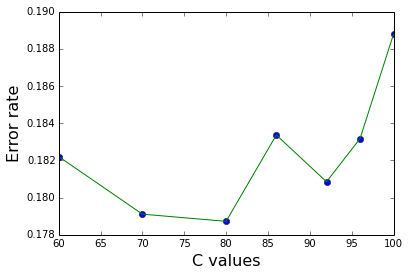

In [28]:
plt.xlabel("C values",fontsize=16)
plt.ylabel("Error rate",fontsize=16)
plt.plot(C_list,mse_lst_for_diff_C,'o')
plt.plot(C_list,mse_lst_for_diff_C,'-')

In [31]:
spam_data_test = scipy.io.loadmat("data/spam-dataset/spam_data.mat")
test_data = spam_data_test['test_data']
clf = svm.LinearSVC(C=80)
clf.fit(train_data,train_labels)
result = clf.predict(test_data)
a = numpy.array([np.arange(1,5858),result],dtype=np.int64).T
print shape(a)
numpy.savetxt("Submission_Spam.csv", a, delimiter=",",fmt='%i')

(5857, 2)


#### Added more features: words "cheap", "medication","discount"
I added the features "cheap","medication" and "discount" in the feature.py to generate a new spam_data.mat dataset that included these feature (35 dimensions). However, my validation score decreased due to this. I removed the feature "discount" because it showed up many times in both ham and spam, whereas "cheap" and "medication" had many emails in the spam/ directory but only one or two emails in the ham/ directory. 

In [32]:
spam_data_test = scipy.io.loadmat("data/spam-dataset/spam_data.mat")
test_data = spam_data_test['test_data']
train_data = spam_data_test['training_data']
train_label = spam_data_test['training_labels']
clf = svm.LinearSVC(C=92)
clf.fit(train_data,train_label[0])
result = clf.predict(test_data)
a = numpy.array([np.arange(1,5858),result],dtype=np.int64).T
print shape(a)
numpy.savetxt("Submission_Spam2.csv", a, delimiter=",",fmt='%i')

(5857, 2)


#### Removed discount from feature 

In [33]:
spam_data_test = scipy.io.loadmat("data/spam-dataset/spam_data.mat")
test_data = spam_data_test['test_data']
train_data = spam_data_test['training_data']
train_label = spam_data_test['training_labels']
clf = svm.LinearSVC(C=92)
clf.fit(train_data,train_label[0])
result = clf.predict(test_data)
a = numpy.array([np.arange(1,5858),result],dtype=np.int64).T
print shape(a)
numpy.savetxt("Submission_Spam3.csv", a, delimiter=",",fmt='%i')

(5857, 2)


#References

- "1.4. Support Vector Machines." 1.4. Support Vector Machines — _Scikit-learn 0.17 Documentation_. N.p., n.d. Web. 01 Feb. 2016.
- Markham, Kevin. "Simple Guide to Confusion Matrix Terminology." _Data School_. N.p., 25 Mar. 2014. Web. 01 Feb. 2016.
- "Confusion Matrix." Confusion Matrix — _Scikit-learn 0.17 Documentation_. N.p., n.d. Web. 02 Feb. 2016.
- James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. "Chapter 5 Resampling Methods." _An Introduction to Statistical Learning: With Applications in R_. N.p.: Springer, n.d. 180-83. Print.
- "Confusion Matrix." Confusion Matrix — _Scikit-learn 0.17 Documentation_. N.p., n.d. Web. 04 Feb. 2016.